# Experimentacion

## Experimento 1 - Comparación entre golosos

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [131]:
import pcmi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

In [41]:
mypath    = "../instancias"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
inFiles   = [file for file in onlyfiles if file.split(".")[1] == "in"]
outFiles  = [file for file in onlyfiles if file.split(".")[1] == "out"]

['CMI_n30.in', 'CMI_n14.in', 'CMI_n20.in', 'CMI_n6.in', 'CMI_n24.in', 'CMI_n10.in', 'CMI_n8.in', 'CMI_n18.in', 'CMI_n28.in', 'CMI_n26.in', 'CMI_n12.in', 'CMI_n16.in', 'CMI_n22.in']


In [43]:
algoritmos = ["S-LF", "W", "WP", "TS-E", "TS-C", "C"]
golosos    = ["S-LF", "W", "WP", "C"]
tabusearch = ["TS-E", "TS-C"]

In [163]:
columnas = ["Instancia", "Inicial", "Tabu", "Time", "Impacto", "Optimo", "Algoritmo"]
dfTabu   = pd.DataFrame(columns = columnas)
dfTabu   = dfTabu.astype({"Impacto":"int32", "Optimo":"int32"})

for repeat in range(5):
    for tabu in tabusearch:
        for inicial in golosos:
            for file in inFiles:
                instancia = f"../instancias/{file}"
                salida    = f"../instancias/{file[:-3]}.out"
                
                solucion, tiempo, optimo = pcmi.run(tabu, instancia, salida, inicial)
                impacto, coloreo = solucion

                entry  = {'Instancia': file, 'Inicial': inicial, 'Tabu': tabu, 'Time': tiempo*1000, 
                          'Impacto': int(impacto), 'Optimo': int(optimo), 'Algoritmo': f"{tabu}-{inicial}"}
                dfTabu = dfTabu.append(entry, ignore_index=True)

dfTabu["Gap"] = (dfTabu["Optimo"] - dfTabu["Impacto"])/dfTabu["Optimo"]

In [153]:
dfTabu2 = dfTabu.groupby(["Tabu", "Inicial", "Instancia"]).mean().reset_index()
dfTabu2.sort_values(by=['Instancia']).head()

,Tabu,Inicial,Instancia,Time,Impacto,Optimo
0,TS-C,C,CMI_n10.in,501.0088,3,3
26,TS-C,W,CMI_n10.in,436.6582,3,3
52,TS-E,C,CMI_n10.in,655.5952,2,3
65,TS-E,S-LF,CMI_n10.in,57.8404,3,3
13,TS-C,S-LF,CMI_n10.in,53.1278,3,3


In [118]:
columnas = ["Instancia", "Algoritmo", "Time", "Impacto", "Optimo"]
dfGoloso = pd.DataFrame(columns = columnas)
dfGoloso = dfGoloso.astype({"Impacto":"int32", "Optimo":"int32"})

for repeat in range(10):
    for algoritmo in golosos:
        for file in inFiles:
            instancia = f"../instancias/{file}"
            salida    = f"../instancias/{file[:-3]}.out"
            solucion, tiempo, optimo = pcmi.run(algoritmo, instancia, salida)
            impacto, coloreo = solucion

            entry    = {'Instancia': file, 'Algoritmo': algoritmo, 'Time': tiempo*1000, 'Impacto': int(impacto), 'Optimo': int(optimo)}
            dfGoloso = dfGoloso.append(entry, ignore_index=True)
            
dfGoloso["Gap"] = (dfGoloso["Optimo"] - dfGoloso["Impacto"])/dfGoloso["Optimo"]

In [133]:
dfGoloso.sort_values(by=['Instancia'])

,Instancia,Algoritmo,Time,Impacto,Optimo
278,CMI_n10.in,W,20.247,2,3
343,CMI_n10.in,WP,20.544,2,3
174,CMI_n10.in,W,19.480,2,3
96,CMI_n10.in,C,6.429,0,3
421,CMI_n10.in,S-LF,40.022,3,3
...,...,...,...,...,...
214,CMI_n8.in,S-LF,25.321,6,6
97,CMI_n8.in,C,6.706,0,6
448,CMI_n8.in,WP,23.637,4,6
318,CMI_n8.in,S-LF,25.614,6,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

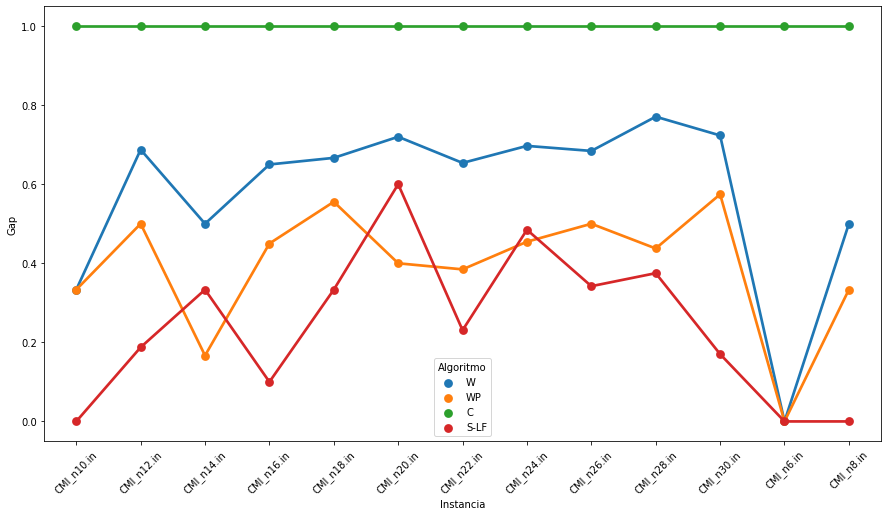

In [185]:
plt.figure(figsize=(15,8))
g = sns.pointplot(data=dfGoloso.sort_values(by=['Instancia']), x="Instancia", y="Gap", hue="Algoritmo")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

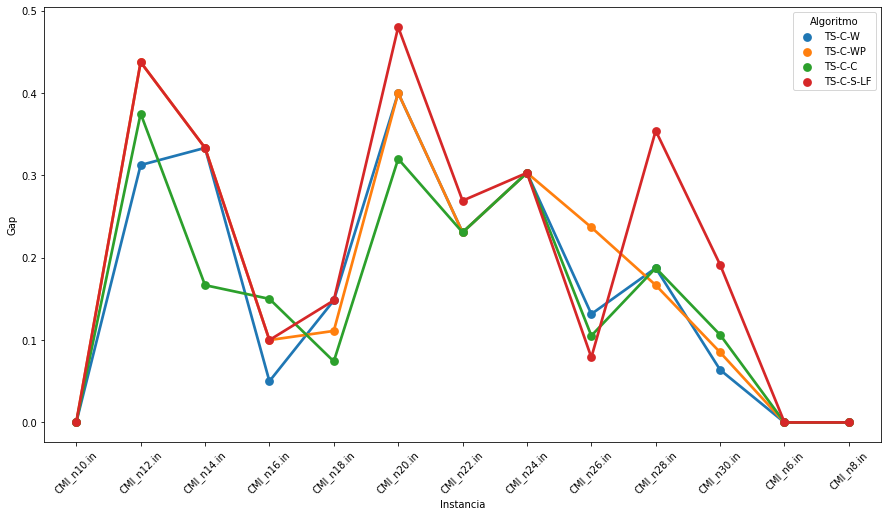

In [183]:
plt.figure(figsize=(15,8))
g = sns.pointplot(data=dfTabu[dfTabu["Tabu"]=="TS-C"].sort_values(by=['Instancia']), x="Instancia", y="Gap", hue="Algoritmo")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

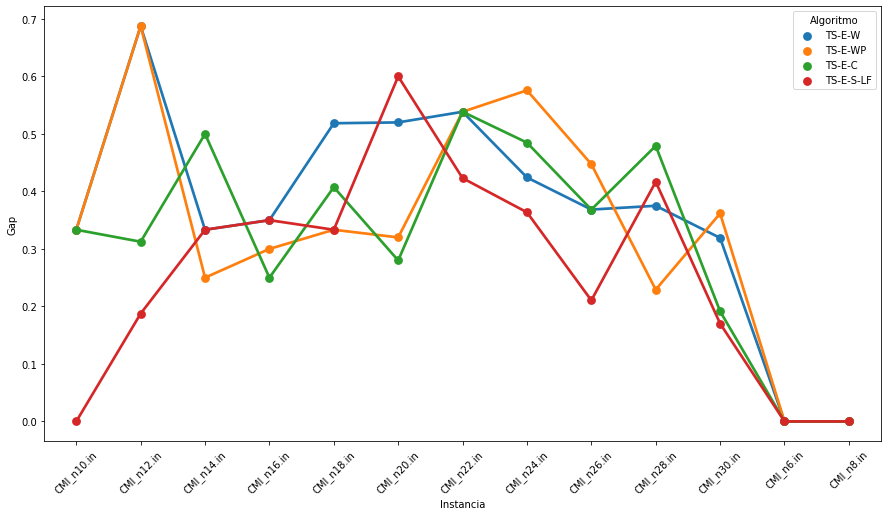

In [182]:
plt.figure(figsize=(15,8))
g = sns.pointplot(data=dfTabu[dfTabu["Tabu"]=="TS-E"].sort_values(by=['Instancia']), x="Instancia", y="Gap", hue="Algoritmo")
plt.xticks(rotation=45)

# Conclusiones: no hay conclusiones